# EXPLORATORY DATA ANALYSIS OF STUDENT PERFORMANCE IN EXAMINATION

According to Wikipedia,an examination or test is an educational assessment intended to measure a test-taker's knowledge, skill, aptitude, physiscal fitness or classification in many other topics. Examinations are useful as it measures a student's progess towards predetermined objectives. So there are also some factors, which affect the performance of the student


The goal of this project is to take an indepth look at a student dataset which contains marks secured in various subjects by high school students from the United States, downloaded from kaggle. The dataset contains various information of 1000 high school students. The main objective of analyzing this data is to understand which factors influence students performance the most.
To know which factor may affect the student's performance, we classify the score into couple of ranks, and figure out which feature affects the score more significant. The independent variables are follow:


gender : sex of students

race/ethnicity : ethnicity of students

parental level of education : parents' final education

lunch : having lunch before test (standard or free/reduced lunch)

test preparation course : complete or not complete before test




In [1]:
#Importing neccessary libraries for the analysis
import numpy as np
import pandas as pd #data processing and loading the dataset

#visualization tool
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Reading the data from a CSV file into Pandas DataFrame.
data = pd.read_csv(r'C:\Users\USER\Desktop\StudentsPerformance.csv')

In [3]:
#Looking at the first 5 entry in the dataset
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
#To get the number of column and row
data.shape

(1000, 8)

The dataset contains details of 1000 high school students

In [5]:
print('Total rows are:', data.shape[0])
print('Total columns are:', data.shape[1])

Total rows are: 1000
Total columns are: 8


In [6]:
#Checking data types
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
#show the name of each column in the dataset
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [9]:
#Let's check if there are missing values in the dataset
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Fortunately, there are no missing values in this dataset. I will now proceed to analyze the dataset. 

In [10]:
#Let's check if there are duplicate values in the dataset
data.duplicated().sum()

0

There is no duplicate value

In [11]:
#To get get the statistical information of the data
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


OBSERVATION_1: It is clear that average person gets 66.09 for the math test, 68.05 for the writing test and 69.17 for the reading test.
Only math score has minimum score of 0. This could mean that students were not preparing good for the math exam. Also, math score has the lowest mean value. So, this happenes because students really do not prepare for exam or math is hard itself.

In [12]:
#To print the unique value IN each column
for i in range(5):
    print('Unique values in', data.columns[i], 'are:', data[data.columns[i]].unique(), '\n')

Unique values in gender are: ['female' 'male'] 

Unique values in race/ethnicity are: ['group B' 'group C' 'group A' 'group D' 'group E'] 

Unique values in parental level of education are: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 

Unique values in lunch are: ['standard' 'free/reduced'] 

Unique values in test preparation course are: ['none' 'completed'] 



In [13]:
#to check the number of unique values in each column
for i in range(len(data.columns)-3):
    print('Total number of unique values in', data.columns[i], 'are:', data[data.columns[i]].nunique(), '\n')

Total number of unique values in gender are: 2 

Total number of unique values in race/ethnicity are: 5 

Total number of unique values in parental level of education are: 6 

Total number of unique values in lunch are: 2 

Total number of unique values in test preparation course are: 2 



In [14]:
#We have to rename some column names to make the names easier to access
data.rename(columns = {'race/ethnicity':'race_ethnicity', 'parental level of education':'parent_Education',
                       'test preparation course':'prep_course', 'math score':'math_score',
                       'reading score':'reading_score', 'writing score':'writing_score'
                       }, inplace = True)
data.head()

,gender,race_ethnicity,parent_Education,lunch,prep_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [15]:
#Add Columns for total score and average score
data['Total_score'] = data['math_score']+ data['reading_score']+ data['writing_score']
data['Average_score'] = (data.Total_score/3).round(2)

In [16]:
#Assigning grade to each student

def score_grade(Average_score): #defining a function to assign grade to each student
    if (Average_score >=70):
        return 'A'
    elif (Average_score >=60):
        return 'B'
    elif (Average_score >=50):
        return 'C'
    elif (Average_score >=40):
        return 'D'
    else:
        return 'F'

#applying the function to the column 'Grade'      
data['Grade'] = data.apply(lambda x: score_grade(x['Average_score']), axis = 1) 
data.head(7) #the first seven entry

,gender,race_ethnicity,parent_Education,lunch,prep_course,math_score,reading_score,writing_score,Total_score,Average_score,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67,A
1,female,group C,some college,standard,completed,69,90,88,247,82.33,A
2,female,group B,master's degree,standard,none,90,95,93,278,92.67,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33,D
4,male,group C,some college,standard,none,76,78,75,229,76.33,A
5,female,group B,associate's degree,standard,none,71,83,78,232,77.33,A
6,female,group B,some college,standard,completed,88,95,92,275,91.67,A


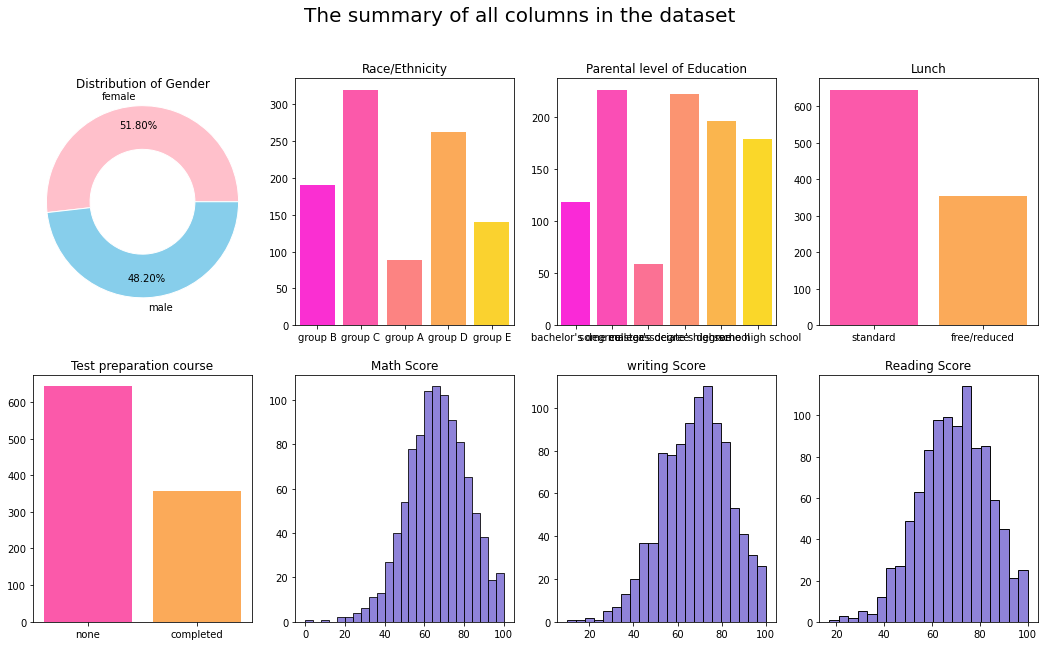

In [17]:
#Graph to visualize each column in the dataset
f, ax = plt.subplots(2,4, figsize= (18,10))
f.suptitle('The summary of all columns in the dataset', size = 20) #shows the title of the subplots

#plot for gender
plt.subplot(241)
p = data['gender'].value_counts()
plt.pie(p.values, labels = p.index, wedgeprops = {'edgecolor': 'white', 'width': 0.5}, radius = 1.1, 
        colors = ['pink', 'skyblue'], autopct = '%0.2f%%', pctdistance = 0.8)
plt.title('Distribution of Gender')

#plot for race/Ethnicity
plt.subplot(242)
sns.countplot(x = data['race_ethnicity'], palette = 'spring',saturation=0.95)
plt.xlabel('')
plt.ylabel('')
plt.title('Race/Ethnicity')

#plot for parental level of education
plt.subplot(243)
sns.countplot(x = data['parent_Education'], palette = 'spring',saturation=0.95)
plt.xlabel('')
plt.ylabel('')
plt.title('Parental level of Education')

#plot for type of lunch taken by each student
plt.subplot(244)
sns.countplot(x = data['lunch'], palette = 'spring',saturation=0.95)
plt.xlabel('')
plt.ylabel('')
plt.title('Lunch')

#plot for count of preparation course
plt.subplot(245)
sns.countplot(x = data['prep_course'], palette = 'spring',saturation=0.95)
plt.xlabel('')
plt.ylabel('')
plt.title('Test preparation course')

#plot for math score
plt.subplot(246)
sns.histplot(x = data['math_score'], color = 'slateblue')
plt.xlabel('')
plt.ylabel('')
plt.title('Math Score')

#plot for writing score
plt.subplot(247)
sns.histplot(x = data['writing_score'], color = 'slateblue')
plt.xlabel('')
plt.ylabel('')
plt.title('writing Score')

#plot for reading score
plt.subplot(248)
sns.histplot(x = data['reading_score'], color = 'slateblue')
plt.xlabel('')
plt.ylabel('')
plt.title('Reading Score')

plt.show()

The above graphs show the visualization for each column in the dataset. To get the insights from the column, I will analyze and visualize each column. 

GETTING INSIGHT FROM THE GENDER'S COLUMN

In [18]:
#To get the count of female and male data in the dataset.
data['gender'].value_counts().rename_axis('gender').reset_index(name='Total count')

,gender,Total count
0,female,518
1,male,482


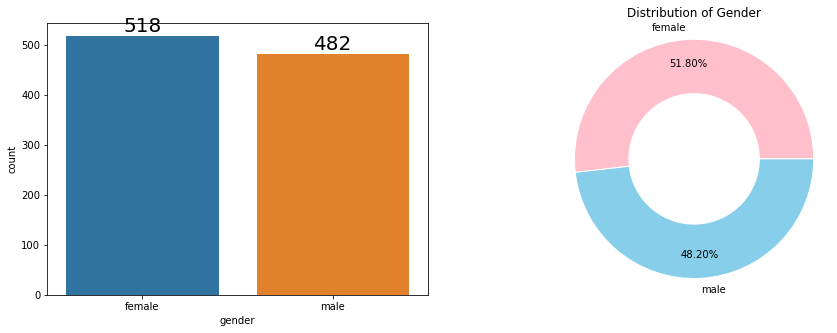

In [19]:
#Visualizing the count
f,ax=plt.subplots(1,2,figsize=(15,5)) #to plot two graphs on a plot
#using countplot to plot a bar chart for male and female count
sns.countplot(x= data['gender'], ax = ax[0])
for container in ax[0].containers: #To show the respective numbers on the the bar
    ax[0].bar_label(container,color='black',size=20)

#to plot pie chart for the count
p = data['gender'].value_counts()
plt.pie(p.values, labels = p.index, wedgeprops = {'edgecolor': 'white', 'width': 0.5}, radius = 1.1, 
        colors = ['pink', 'skyblue'], autopct = '%0.2f%%', pctdistance = 0.8)
plt.title('Distribution of Gender')
plt.show()

OBSERVATION_2: It is observed that in this dataset there are more data for females than males. There are 518 details of female students which represent 51.80% of the dataset. While 482 details of male students were recorded which represent 48.20% of the dataset.

RACE/ETHNICITY'S COLUMN

In [20]:
#To get the count of each ethnic group in the dataset
data.groupby('race_ethnicity').size().rename_axis('race_ethnicity').reset_index(name='Total count')

,race_ethnicity,Total count
0,group A,89
1,group B,190
2,group C,319
3,group D,262
4,group E,140


In [21]:
#To show how each gender is represented across each ethnic groups
pd.crosstab(data['gender'],data['race_ethnicity'])


race_ethnicity,group A,group B,group C,group D,group E
gender,,,,,
female,36,104,180,129,69
male,53,86,139,133,71


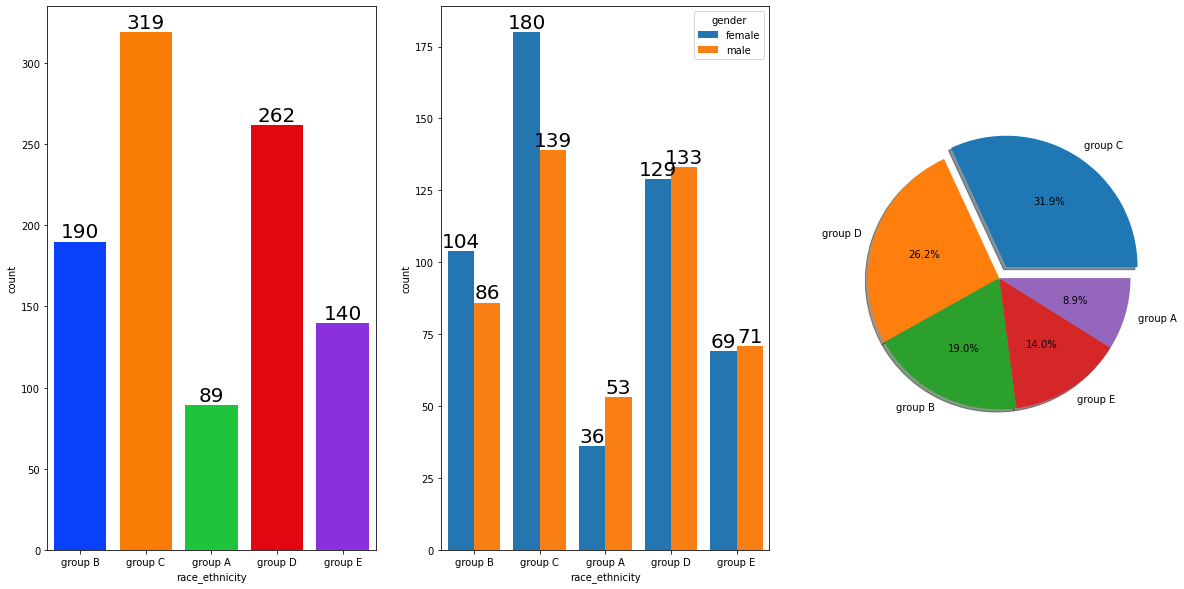

In [22]:
f,ax=plt.subplots(1,3,figsize=(20,10)) #subplot for 3 graphs on a row
sns.countplot(x = data['race_ethnicity'], palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers: #To show the respective numbers on the the bar
    ax[0].bar_label(container,color='black',size=20)
    
#pie chart for the count of each ethnic group
plt.pie(data['race_ethnicity'].value_counts(), labels = data['race_ethnicity'].value_counts().index,
        explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)

#A bar chart to show how each gender is represented across the ethinic groups
sns.countplot(x = data['race_ethnicity'], hue = data['gender'],ax = ax[1], saturation = 0.95)
for container in ax[1].containers:#To show the respective numbers on the the bar
    ax[1].bar_label(container,color='black',size=20)
    
plt.show()  

OBSERVATION_3: The most number of students come from group C and the least number of students come from group A

PARENT LEVEL OF EDUCATION

In [23]:
#Count for each unique values in the parent_Education column
data.groupby('parent_Education').size().rename_axis('Parent_Education').reset_index(name = 'Total_count')

,Parent_Education,Total_count
0,associate's degree,222
1,bachelor's degree,118
2,high school,196
3,master's degree,59
4,some college,226
5,some high school,179


In [24]:
#Count for the distribution of parent level of education across each gender
pd.crosstab(data['gender'],data['parent_Education'])

parent_Education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
gender,,,,,,
female,116,63,94,36,118,91
male,106,55,102,23,108,88


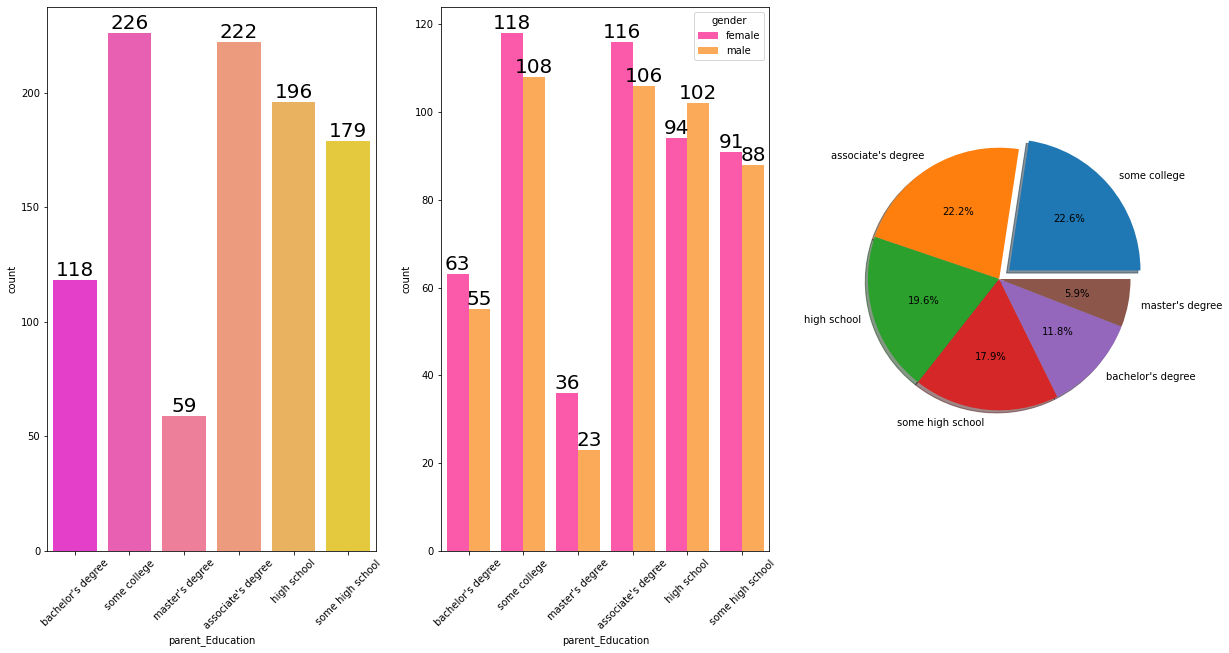

In [25]:
f,ax =plt.subplots(1,3, figsize=(20,10)) #subplot for 3 graphs 
p = sns.countplot(x = data['parent_Education'],palette = 'spring', ax = ax[0])
plt.setp(p.get_xticklabels(), rotation=45) #to rotate the labels on the x axis
for container in ax[0].containers: #To show the respective numbers on the the bar
    ax[0].bar_label(container,color='black',size=20)
#pie chart for the count of each unique value in the parent_Education column
plt.pie(data['parent_Education'].value_counts(), labels = data['parent_Education'].value_counts().index, explode=[0.1,0,0,0,0,0],autopct='%1.1f%%',shadow=True)
#A bar chart to show how each unique value in the parent_Education column is distrbuted in respect to the gender
p = sns.countplot(x = data['parent_Education'], hue = data['gender'],palette = 'spring',ax = ax[1], saturation = 0.95)
plt.setp(p.get_xticklabels(), rotation=45)
for container in ax[1].containers: #To show the respective numbers on the the bar
    ax[1].bar_label(container,color='black',size=20)
plt.show()

OBSERVATION_4: It is observed that most parents have 'some college' degree While parents with master's degree were least represented.

LUNCH'S COLUMN

In [26]:
#Count for each unique values in the Lunch column
data.groupby('lunch').size().rename_axis('Lunch').reset_index(name = 'Total_count')

,Lunch,Total_count
0,free/reduced,355
1,standard,645


In [27]:
#Count for how the type of lunch taken is distributed across the genders
pd.crosstab(data['gender'],data['lunch'])

lunch,free/reduced,standard
gender,,
female,189,329
male,166,316


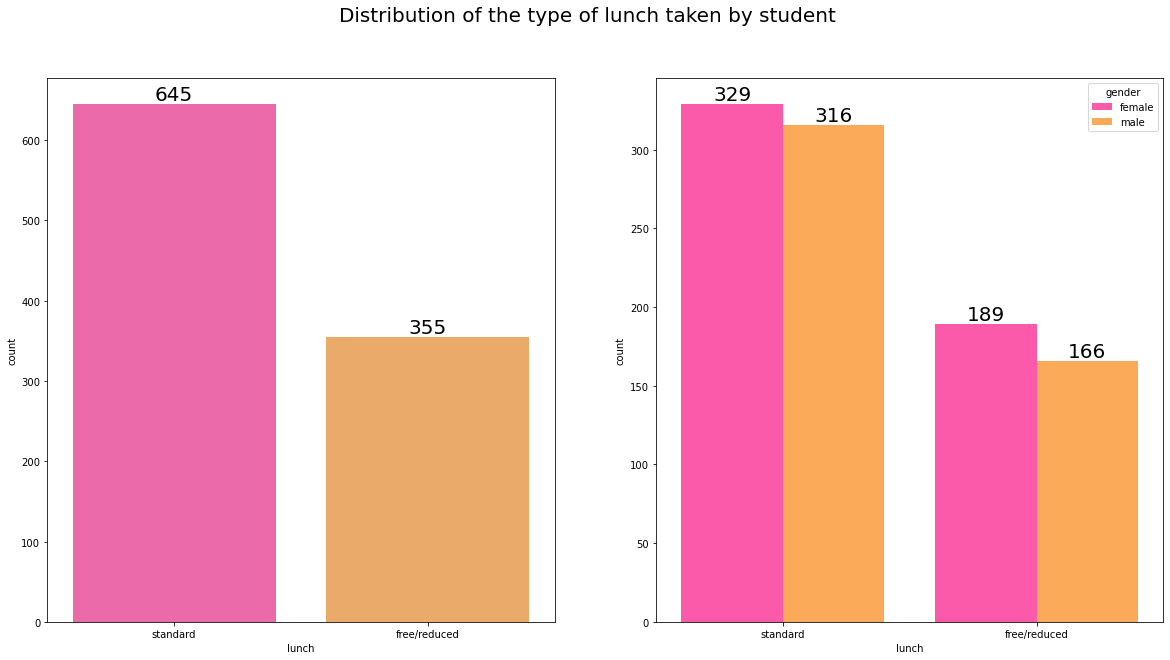

In [28]:
f,ax = plt.subplots(1,2,figsize = (20,10)) #subplot for 2 graphs 
f.suptitle('Distribution of the type of lunch taken by student', size = 20) #shows the title of the subplots
sns.countplot(x = data['lunch'], ax = ax[0], palette = 'spring')
for container in ax[0].containers:  #To show the respective numbers on the the bar
    ax[0].bar_label(container, color = 'black', size = 20)
    
#to visualize how the type of lunch taken is distributed across the genders
sns.countplot(x = data['lunch'], hue = data['gender'],palette = 'spring', saturation = 0.95)  
for container in ax[1].containers:  #To show the respective numbers on the the bar
    ax[1].bar_label(container, color = 'black', size = 20)
    
plt.show()

OBSERVATION_5: It is observed that, majority of the students have standard lunch

TEST PREPARATION'S COLUMN

In [29]:
#count for test preparation course
data.groupby('prep_course').size().rename_axis('Prep_course').reset_index(name = 'Total_count')

,Prep_course,Total_count
0,completed,358
1,none,642


In [30]:
#Count for how the test preparation course is distributed across the gender
pd.crosstab(data['gender'],data['prep_course'])

prep_course,completed,none
gender,,
female,184,334
male,174,308


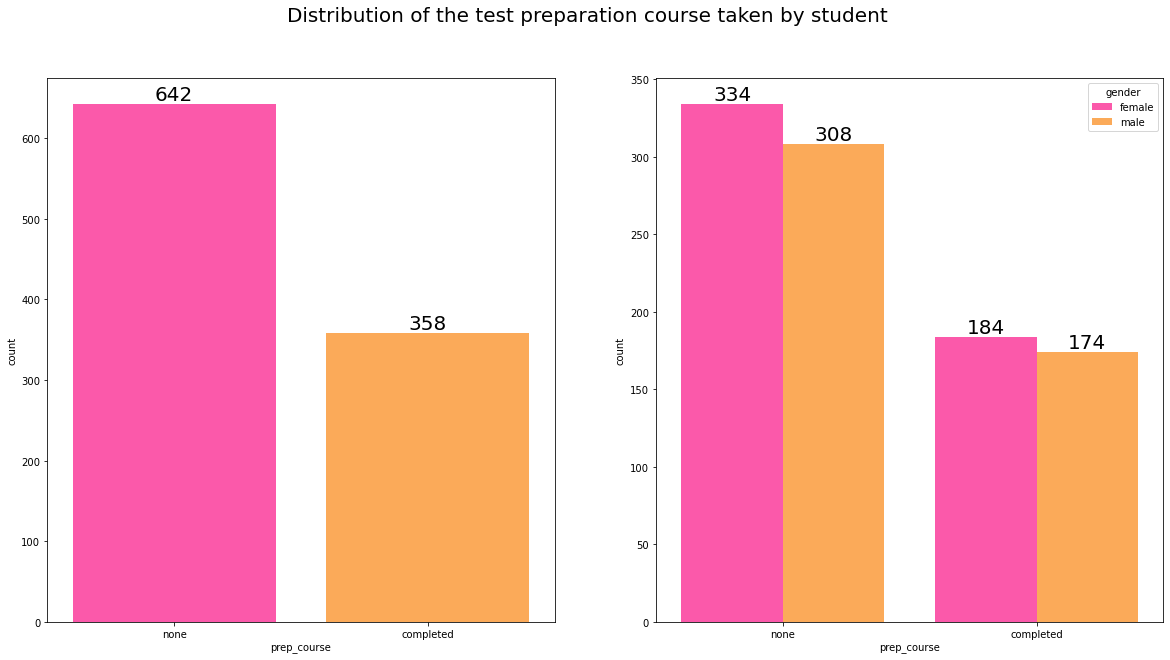

In [31]:
f,ax = plt.subplots(1,2,figsize = (20,10)) #subplot for 2 graphs 
#shows the title of the subplots
f.suptitle('Distribution of the test preparation course taken by student', size = 20)
sns.countplot(x = data['prep_course'],ax= ax[0], palette = 'spring',saturation=0.95)
for container in ax[0].containers:  #To show the respective numbers on the the bar
    ax[0].bar_label(container, color = 'black', size = 20)
    
sns.countplot(x = data['prep_course'], hue = data['gender'],palette = 'spring', saturation = 0.95)  
for container in ax[1].containers:  #To show the respective numbers on the the bar
    ax[1].bar_label(container, color = 'black', size = 20)
plt.show()

OBSERVATION_6: It is clear that most students had not completed the test preparation course. Among the students who had completed the test preparation course, there were more female students (184) than male students(174).

### GENERAL INSIGHT

In [32]:
#First three entry
data.head(3)

,gender,race_ethnicity,parent_Education,lunch,prep_course,math_score,reading_score,writing_score,Total_score,Average_score,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67,A
1,female,group C,some college,standard,completed,69,90,88,247,82.33,A
2,female,group B,master's degree,standard,none,90,95,93,278,92.67,A


<AxesSubplot:>

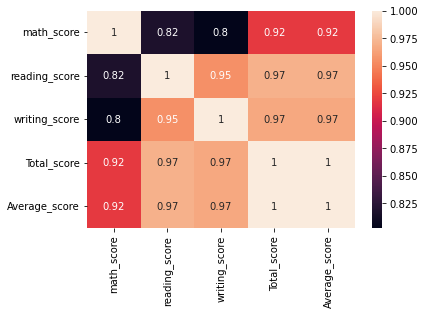

In [33]:
#To check how the scores are correlated
correlation = data.corr()
sns.heatmap(correlation,xticklabels = correlation.columns, yticklabels = correlation.columns,
            annot=True)

OBSERVATION_8: Total_score and Average_score are highly correlated with individual score.Also,The heatmap shows that the 3 scores are highly correlated. Reading score has a correlation coefficient of 0.95 with the writing score. Math score has a correlation coefficient of 0.82 with the reading score and 0.80 with the wrting score.
It can be concluded that reading score is also highly correlated with writing score which means students who reads well can also writes well.

In [34]:
data.groupby('gender').mean() #The mean score of each gender

,math_score,reading_score,writing_score,Total_score,Average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837303


In [35]:
#To store the scores' name in a variable
score_data = ['math_score', 'reading_score', 'writing_score', 'Total_score','Average_score']

In [36]:
#To check the maximum score of each gender
data.groupby('gender')[score_data].max()

,math_score,reading_score,writing_score,Total_score,Average_score
gender,,,,,
female,100,100,100,300,100.0
male,100,100,100,300,100.0


In [37]:
#To check the minimum score of each gender
data.groupby('gender')[score_data].min()

,math_score,reading_score,writing_score,Total_score,Average_score
gender,,,,,
female,0,17,10,27,9.0
male,27,23,15,69,23.0


In [38]:
#The numbers of students who passedand failed the test
p= data[data['Average_score']>=50]['Average_score'].count() #passed
F= data[data['Average_score']<50]['Average_score'].count() #failed

print('About', p, 'scored 50 marks and above')
print('About', F, 'scored less than 50 marks')

About 897 scored 50 marks and above
About 103 scored less than 50 marks


In [39]:
#Number of students who passed the test based on gender
data[data['Average_score']>=50].groupby('gender').size()

gender
female    479
male      418
dtype: int64

OBSERVATION_9: The number of female students who scored more than 50 is more than the number of male students who scored 50 and above

In [40]:
#Number of students who failed the test based on gender
data[data['Average_score']<50].groupby('gender').size()

gender
female    39
male      64
dtype: int64

In [41]:
t_percen_pass = ((897/1000)*100) #total percentage of students who passed the test
f_percen_pass = (479/518)*100 #percentage of female students who passed the test
m_percen_pass = (418/482)*100 #percentage of female students who passed the test

print('Percentage of total students passed:',t_percen_pass,'%')
print('Percentage of total female students passed:',f_percen_pass,'%')
print('Percentage of total male students passed:',m_percen_pass,'%')

Percentage of total students passed: 89.7 %
Percentage of total female students passed: 92.47104247104248 %
Percentage of total male students passed: 86.72199170124482 %


In [42]:
#gender with perfect score
data[data['Total_score'] == 300]

,gender,race_ethnicity,parent_Education,lunch,prep_course,math_score,reading_score,writing_score,Total_score,Average_score,Grade
458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.0,A
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,100.0,A
962,female,group E,associate's degree,standard,none,100,100,100,300,100.0,A


OBSERVATION_10: Two female students and one male student have a perfect score. The three students are from group E

In [43]:
#Numbers of student who scored 100 in math per gender
data[data['math_score'] == 100].groupby('gender').size()

gender
female    3
male      4
dtype: int64

In [44]:
#Numbers of student who scored 100 in reading per gender
data[data['reading_score'] == 100].groupby('gender').size()

gender
female    14
male       3
dtype: int64

In [45]:
#Numbers of student who scored 100 in writing per gender
data[data['writing_score'] == 100].groupby('gender').size()

gender
female    13
male       1
dtype: int64

In [46]:
#Top ten students based on total score
data.sort_values(by='Total_score', ascending = False).head(10)

,gender,race_ethnicity,parent_Education,lunch,prep_course,math_score,reading_score,writing_score,Total_score,Average_score,Grade
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,100.00,A
458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.00,A
962,female,group E,associate's degree,standard,none,100,100,100,300,100.00,A
114,female,group E,bachelor's degree,standard,completed,99,100,100,299,99.67,A
179,female,group D,some high school,standard,completed,97,100,100,297,99.00,A
712,female,group D,some college,standard,none,98,100,99,297,99.00,A
165,female,group C,bachelor's degree,standard,completed,96,100,100,296,98.67,A
625,male,group D,some college,standard,completed,100,97,99,296,98.67,A
903,female,group D,bachelor's degree,free/reduced,completed,93,100,100,293,97.67,A
149,male,group E,associate's degree,free/reduced,completed,100,100,93,293,97.67,A


In [47]:
#Last ten students
data.sort_values(by='Total_score', ascending = True).head(10)

,gender,race_ethnicity,parent_Education,lunch,prep_course,math_score,reading_score,writing_score,Total_score,Average_score,Grade
59,female,group C,some high school,free/reduced,none,0,17,10,27,9.00,F
980,female,group B,high school,free/reduced,none,8,24,23,55,18.33,F
596,male,group B,high school,free/reduced,none,30,24,15,69,23.00,F
327,male,group A,some college,free/reduced,none,28,23,19,70,23.33,F
76,male,group E,some high school,standard,none,30,26,22,78,26.00,F
17,female,group B,some high school,free/reduced,none,18,32,28,78,26.00,F
601,female,group C,high school,standard,none,29,29,30,88,29.33,F
787,female,group B,some college,standard,none,19,38,32,89,29.67,F
338,female,group B,some high school,free/reduced,none,24,38,27,89,29.67,F
211,male,group C,some college,free/reduced,none,35,28,27,90,30.00,F


In [48]:
#lowest mark in math
data.sort_values(by='math_score').head(5)

,gender,race_ethnicity,parent_Education,lunch,prep_course,math_score,reading_score,writing_score,Total_score,Average_score,Grade
59,female,group C,some high school,free/reduced,none,0,17,10,27,9.00,F
980,female,group B,high school,free/reduced,none,8,24,23,55,18.33,F
17,female,group B,some high school,free/reduced,none,18,32,28,78,26.00,F
787,female,group B,some college,standard,none,19,38,32,89,29.67,F
145,female,group C,some college,free/reduced,none,22,39,33,94,31.33,F


In [49]:
#lowest mark in reading
data.sort_values(by='reading_score').head(5)

,gender,race_ethnicity,parent_Education,lunch,prep_course,math_score,reading_score,writing_score,Total_score,Average_score,Grade
59,female,group C,some high school,free/reduced,none,0,17,10,27,9.00,F
327,male,group A,some college,free/reduced,none,28,23,19,70,23.33,F
596,male,group B,high school,free/reduced,none,30,24,15,69,23.00,F
980,female,group B,high school,free/reduced,none,8,24,23,55,18.33,F
76,male,group E,some high school,standard,none,30,26,22,78,26.00,F


In [50]:
#lowest mark in writing
data.sort_values(by='writing_score').head(5)

,gender,race_ethnicity,parent_Education,lunch,prep_course,math_score,reading_score,writing_score,Total_score,Average_score,Grade
59,female,group C,some high school,free/reduced,none,0,17,10,27,9.00,F
596,male,group B,high school,free/reduced,none,30,24,15,69,23.00,F
327,male,group A,some college,free/reduced,none,28,23,19,70,23.33,F
76,male,group E,some high school,standard,none,30,26,22,78,26.00,F
980,female,group B,high school,free/reduced,none,8,24,23,55,18.33,F


### EXPLORING MATHS, WRITING AND READING'S COLUMN

In [51]:
#to the number of students who passed or failed math test 
data['math_status'] = np.where(data['math_score']<50, 'F', 'P')
data['math_status'].value_counts()

P    865
F    135
Name: math_status, dtype: int64

In [52]:
#to the number of students who passed or failed reading test
data['reading_status'] = np.where(data['reading_score']<40, 'F', 'P')
data['reading_status'].value_counts()

P    974
F     26
Name: reading_status, dtype: int64

In [53]:
#to the number of students who passed or failed writing test
data['writing_status'] = np.where(data['writing_score']<40, 'F', 'P')
data['writing_status'].value_counts()

P    968
F     32
Name: writing_status, dtype: int64

In [54]:
#Maximum score in math
data['math_score'].max()

100

In [55]:
#Maximum score in reading
data['reading_score'].max()

100

In [56]:
#Maximum score in writing
data['writing_score'].max()

100

OBSERVATION_11: It is observed the highest score in math, reading and writing is 100 respectively

In [57]:
#Miniimum score in math
data['math_score'].min()

0

In [58]:
#Miniimum score in reading
data['reading_score'].min()

17

In [59]:
#Miniimum score in writing
data['writing_score'].min()

10

OBSERVATION_12: It is observed that the minimum score obtained in math is 0, in reading is 17 and in writing is 10.

# FISRT FACTOR: GENDER

In [60]:
#mean score of each gender
gender_data = data.groupby('gender')
gender_data.mean()

,math_score,reading_score,writing_score,Total_score,Average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837303


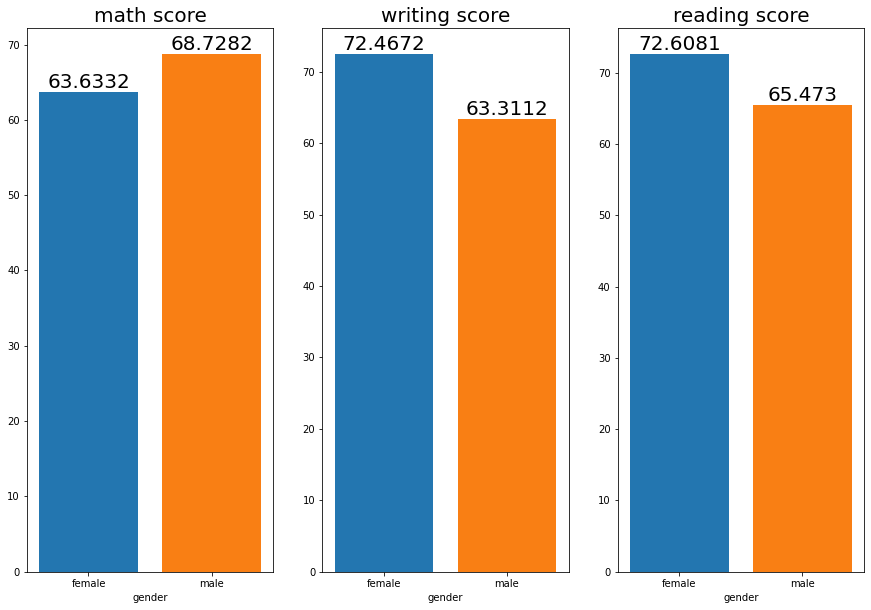

In [61]:
f,ax = plt.subplots(1,3, figsize= (15,10))
#plot for math score
sns.barplot(x = gender_data['math_score'].mean().index, y = gender_data['math_score'].mean().values, ax= ax[0], saturation = 0.95)
ax[0].set_title('math score', color = 'black', size = 20)
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size = 20)

#plot for writing score
sns.barplot(x = gender_data['writing_score'].mean().index, y = gender_data['writing_score'].mean().values, ax= ax[1], saturation = 0.95)
ax[1].set_title('writing score', color = 'black', size = 20)
for container in ax[1].containers:
    ax[1].bar_label(container, color = 'black', size = 20)
    
#plot for reading score
sns.barplot(x = gender_data['reading_score'].mean().index, y = gender_data['reading_score'].mean().values, ax= ax[2], saturation = 0.95)
ax[2].set_title('reading score', color = 'black', size = 20)
for container in ax[2].containers:
    ax[2].bar_label(container, color = 'black', size = 20)
    
plt.show()

 OBSERVATION_13A:We can see that male has better performance in math test, but worse in reading and writing. That is, female students score more than male students on an average in reading and writing

<AxesSubplot:xlabel='gender', ylabel='reading_score'>

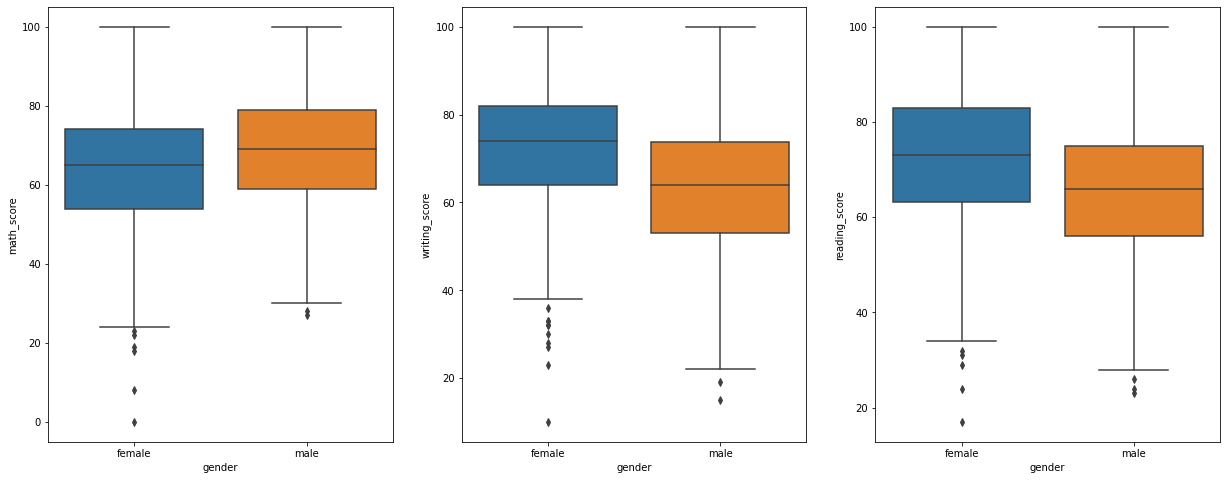

In [62]:
plt.figure(figsize = (21,8))
plt.subplot(131)
sns.boxplot(data = data, x = 'gender', y = 'math_score')
plt.subplot(132)
sns.boxplot(data = data, x = 'gender', y = 'writing_score')
plt.subplot(133)
sns.boxplot(data = data, x = 'gender', y = 'reading_score')

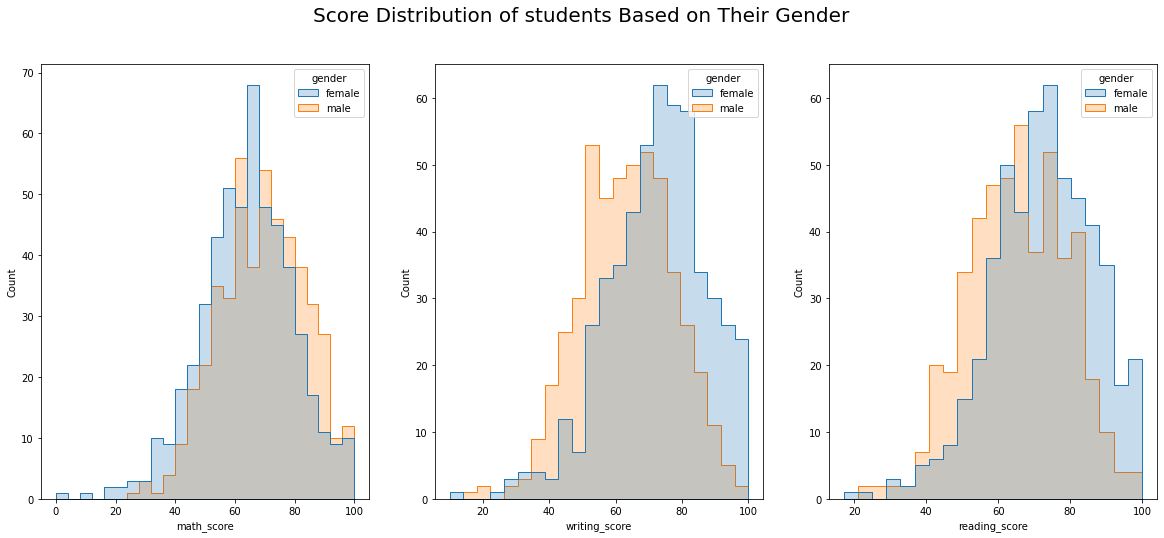

In [63]:
f,ax = plt.subplots(1,3, figsize=(20,8))
f.suptitle('Score Distribution of students Based on Their Gender', size = 20)
sns.histplot(data, x= 'math_score', hue = 'gender', element = 'step', ax = ax[0])
sns.histplot(data, x= 'writing_score', hue = 'gender', element = 'step', ax = ax[1])
sns.histplot(data, x= 'reading_score', hue = 'gender', element = 'step', ax = ax[2])
plt.show()

OBSERVATION_13B: Based on what we can observe, male students who took the math tests got slighly higher scores than female students, though female students who took the reading and writing scores got slitghly higher scores than male students

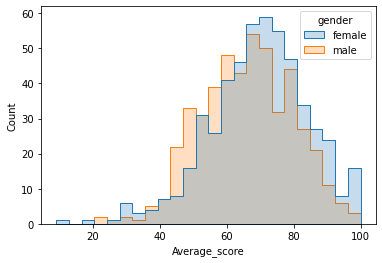

In [64]:
#Histogram to show the average performance of male and female students
sns.histplot(data, x= 'Average_score', hue = 'gender', element = 'step')
plt.show()

OBSERVATION_14: Averagely, we can see that Female students tend to perform well than male students

# 2ND FACTOR:  RACE/ETHNICITY

In [65]:
data.groupby('race_ethnicity').mean()

,math_score,reading_score,writing_score,Total_score,Average_score
race_ethnicity,,,,,
group A,61.629213,64.674157,62.674157,188.977528,62.992135
group B,63.452632,67.352632,65.600000,196.405263,65.468579
group C,64.463950,69.103448,67.827586,201.394984,67.131567
group D,67.362595,70.030534,70.145038,207.538168,69.179389
group E,73.821429,73.028571,71.407143,218.257143,72.752000


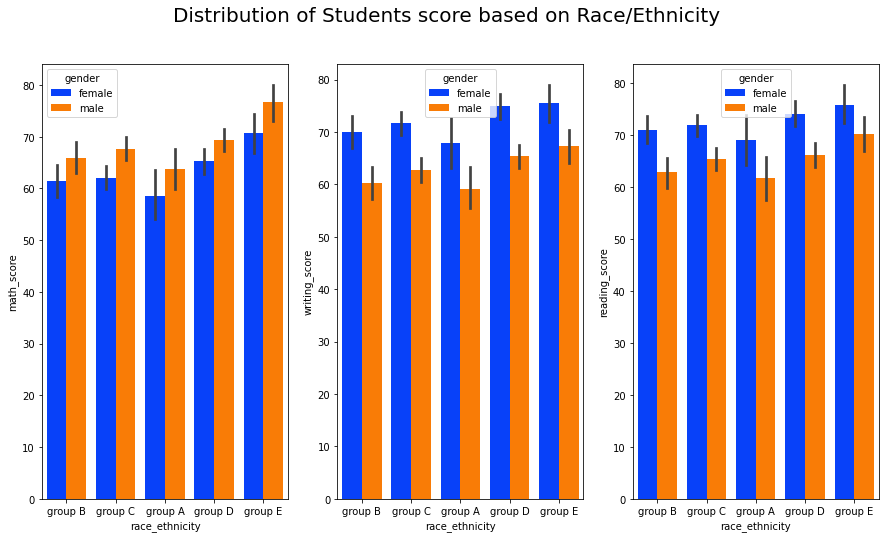

In [66]:
#bar chart for race/ethnicity
f, ax = plt.subplots(1,3, figsize= (15,8))
f.suptitle('Distribution of Students score based on Race/Ethnicity', size = 20 )
sns.barplot(data = data, x = 'race_ethnicity', y = 'math_score', hue = 'gender', palette = 'bright',ax=ax[0], saturation = 0.95)
plt.subplot(132)
sns.barplot(data = data, x = 'race_ethnicity', y = 'writing_score', hue = 'gender', palette = 'bright',ax=ax[1], saturation = 0.95)
plt.subplot(133)
sns.barplot(data = data, x = 'race_ethnicity', y = 'reading_score', hue = 'gender', palette = 'bright',ax=ax[2], saturation = 0.95)
plt.show()

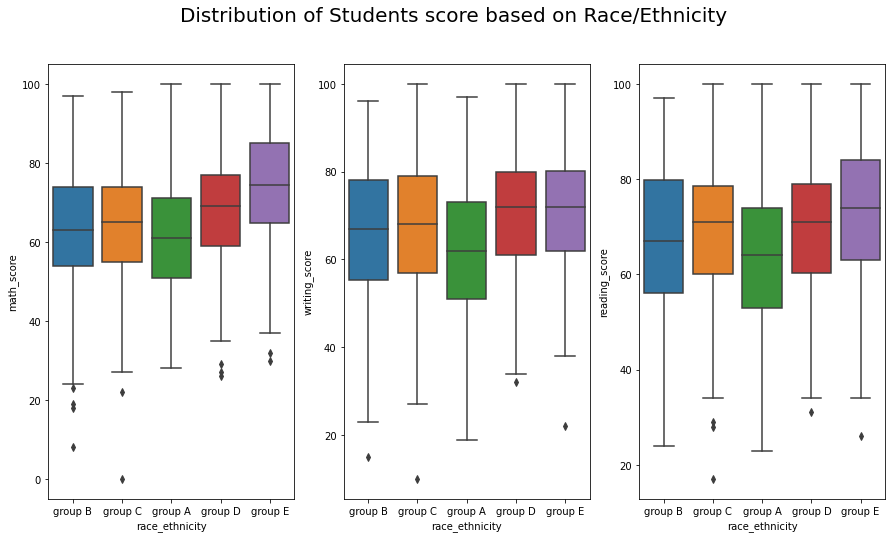

In [67]:
#Boxplot fro race/ethnicity
f, ax = plt.subplots(1,3, figsize= (15,8))
f.suptitle('Distribution of Students score based on Race/Ethnicity', size = 20 )
sns.boxplot(data = data, x = 'race_ethnicity', y = 'math_score', ax = ax[0])
sns.boxplot(data = data, x = 'race_ethnicity', y = 'writing_score', ax = ax[1])
sns.boxplot(data = data, x = 'race_ethnicity', y = 'reading_score', ax = ax[2])
plt.show()

OBSSERVATION_15: From the graphs above, it can be clearly seeen that the students from group E scored better than students from other groups in math. Also group E students are slightly ahead in reading scores as well. Students from all the groups except group A performed equally in writing. Therefore, being group E as a race/ethnicty will make you more likely to get higher scores than those who aren't.

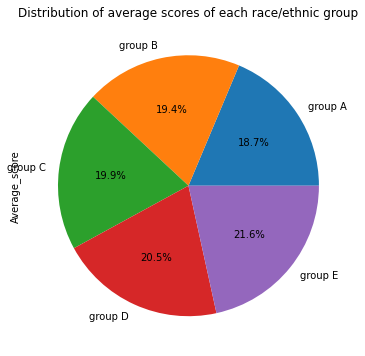

In [68]:
#Pie chart showing distribution of average scores of each race/ethnic group
race = data.groupby('race_ethnicity')['Average_score'].mean()
plt.figure(figsize = (10,6))
race.plot.pie(autopct='%0.1f%%')
plt.title('Distribution of average scores of each race/ethnic group')
plt.show()

OBSERVATION_16: It is seen that students from group E are among the best scorers in the class. Group D students are the second best. Students from group A score the least on an average

In [69]:
pd.crosstab(data['race_ethnicity'],data['parent_Education' ])

parent_Education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
race_ethnicity,,,,,,
group A,14,12,18,3,18,24
group B,41,20,48,6,37,38
group C,78,40,64,19,69,49
group D,50,28,44,23,67,50
group E,39,18,22,8,35,18


In [70]:
pd.crosstab(data['race_ethnicity'],data['prep_course' ])

prep_course,completed,none
race_ethnicity,,
group A,31,58
group B,68,122
group C,117,202
group D,82,180
group E,60,80


In [71]:
pd.crosstab(data['race_ethnicity'],data['lunch' ])

lunch,free/reduced,standard
race_ethnicity,,
group A,36,53
group B,69,121
group C,114,205
group D,95,167
group E,41,99


# 3RD FACTOR: PARENT LEVEL OF EDUCATION

In [72]:
data.groupby('parent_Education').mean()

,math_score,reading_score,writing_score,Total_score,Average_score
parent_Education,,,,,
associate's degree,67.882883,70.927928,69.896396,208.707207,69.568964
bachelor's degree,69.389831,73.000000,73.381356,215.771186,71.923983
high school,62.137755,64.704082,62.448980,189.290816,63.097194
master's degree,69.745763,75.372881,75.677966,220.796610,73.598644
some college,67.128319,69.460177,68.840708,205.429204,68.476106
some high school,63.497207,66.938547,64.888268,195.324022,65.107654


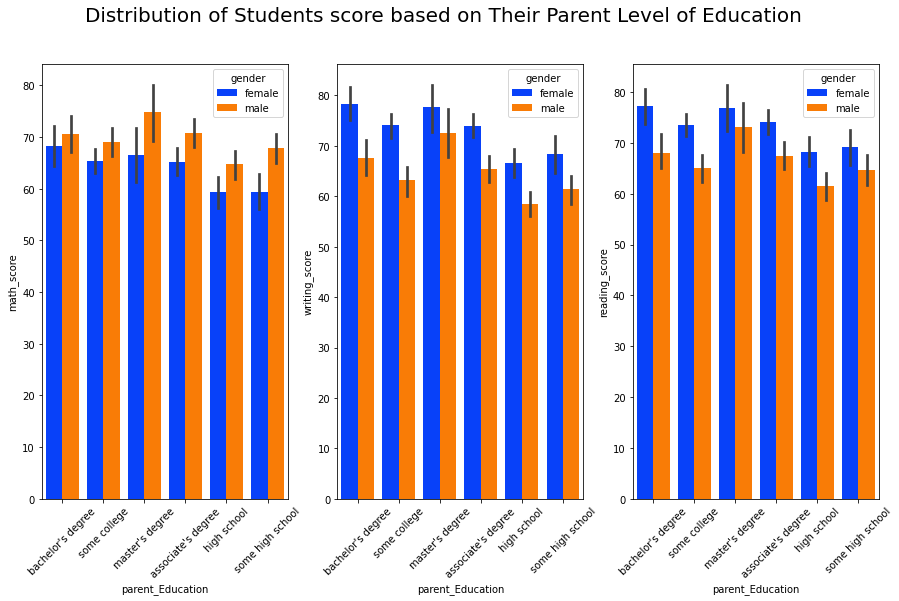

In [73]:
#bar chart
f, ax = plt.subplots(1,3, figsize= (15,8))
f.suptitle('Distribution of Students score based on Their Parent Level of Education ', size = 20 )
p = sns.barplot(data = data, x = 'parent_Education', y = 'math_score', hue = 'gender', palette = 'bright',ax=ax[0], saturation = 0.95)
plt.setp(p.get_xticklabels(), rotation=45)
plt.subplot(132)
p = sns.barplot(data = data, x = 'parent_Education', y = 'writing_score', hue = 'gender', palette = 'bright',ax=ax[1], saturation = 0.95)
plt.setp(p.get_xticklabels(), rotation=45)
plt.subplot(133)
p = sns.barplot(data = data, x = 'parent_Education', y = 'reading_score', hue = 'gender', palette = 'bright',ax=ax[2], saturation = 0.95)
plt.setp(p.get_xticklabels(), rotation=45)
plt.show()

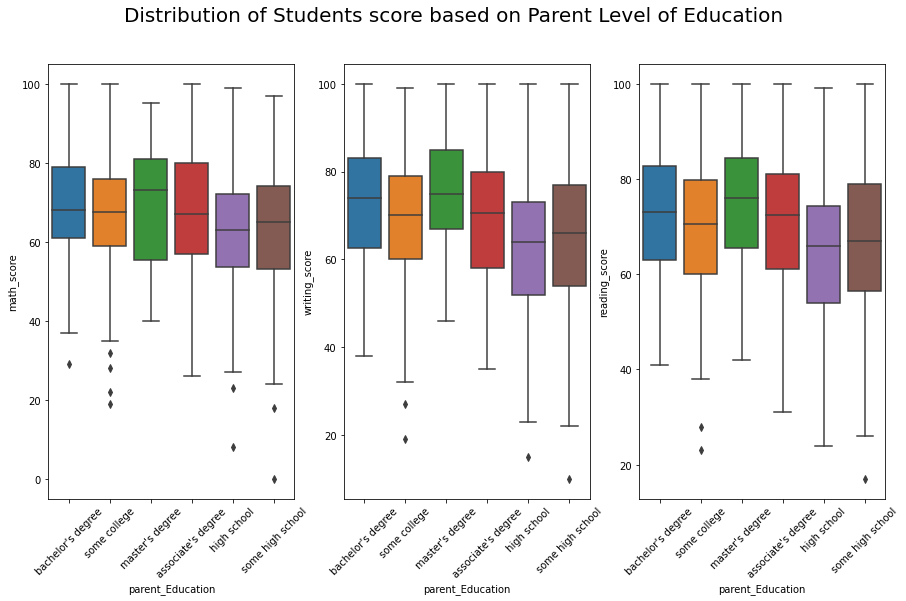

In [74]:
#Boxplot
f, ax = plt.subplots(1,3, figsize= (15,8))
f.suptitle('Distribution of Students score based on Parent Level of Education', size = 20 )
p = sns.boxplot(data = data, x = 'parent_Education', y = 'math_score', ax = ax[0])
plt.setp(p.get_xticklabels(), rotation=45)
p = sns.boxplot(data = data, x = 'parent_Education', y = 'writing_score', ax = ax[1])
plt.setp(p.get_xticklabels(), rotation=45)
p = sns.boxplot(data = data, x = 'parent_Education', y = 'reading_score', ax = ax[2])
plt.setp(p.get_xticklabels(), rotation=45)
plt.show()

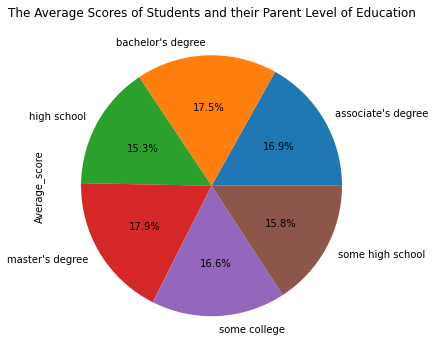

In [75]:
#Pie chart showing the distribution of average scores of each student parents's  level of education
race = data.groupby('parent_Education')['Average_score'].mean()
plt.figure(figsize = (10,6))
race.plot.pie(autopct='%0.1f%%')
plt.title('The Average Scores of Students and their Parent Level of Education')
plt.show()

OBSERVATION_17

Based on the graphs above, students with parent that have master's degree score higher on avergae  in all subjects when compared to other levels of education.Additionally, the minimum score for that group is higher in all subejcts when compared to all other groups.This followed by students who their parents hold a bachelor's degree. Students of parent who have just passed out from high school usually score the least in the class. This is because:
1. Higher levels of education mean a higher socioeconomic status, as well as a greater empahasis placed on the importance of education, leading to higher test scores.
2. Parents with higher education degree can teach their children at home

In [76]:
pd.crosstab(data['parent_Education'],data['race_ethnicity' ])

race_ethnicity,group A,group B,group C,group D,group E
parent_Education,,,,,
associate's degree,14,41,78,50,39
bachelor's degree,12,20,40,28,18
high school,18,48,64,44,22
master's degree,3,6,19,23,8
some college,18,37,69,67,35
some high school,24,38,49,50,18


In [77]:
pd.crosstab(data['race_ethnicity'],data['prep_course' ])

prep_course,completed,none
race_ethnicity,,
group A,31,58
group B,68,122
group C,117,202
group D,82,180
group E,60,80


# 4TH FACTOR: LUNCH

In [78]:
#mean score based on the type of lunch taken
data.groupby('lunch').mean()

,math_score,reading_score,writing_score,Total_score,Average_score
lunch,,,,,
free/reduced,58.921127,64.653521,63.022535,186.597183,62.198986
standard,70.034109,71.654264,70.823256,212.511628,70.837116


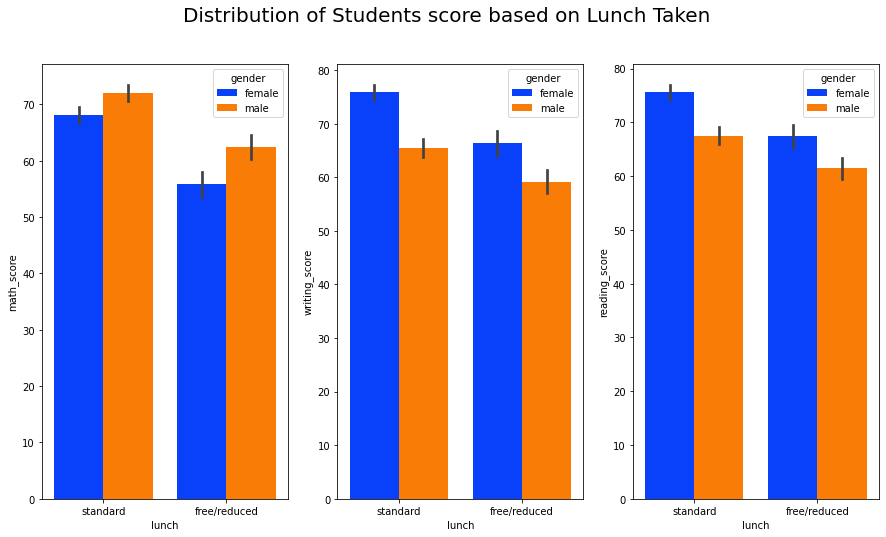

In [79]:
#Bar chart
f, ax = plt.subplots(1,3, figsize= (15,8))
f.suptitle('Distribution of Students score based on Lunch Taken', size = 20 )
sns.barplot(data = data, x = 'lunch', y = 'math_score', hue = 'gender', palette = 'bright',ax=ax[0], saturation = 0.95)
plt.subplot(132)
sns.barplot(data = data, x = 'lunch', y = 'writing_score', hue = 'gender', palette = 'bright',ax=ax[1], saturation = 0.95)
plt.subplot(133)
sns.barplot(data = data, x = 'lunch', y = 'reading_score', hue = 'gender', palette = 'bright',ax=ax[2], saturation = 0.95)
plt.show()

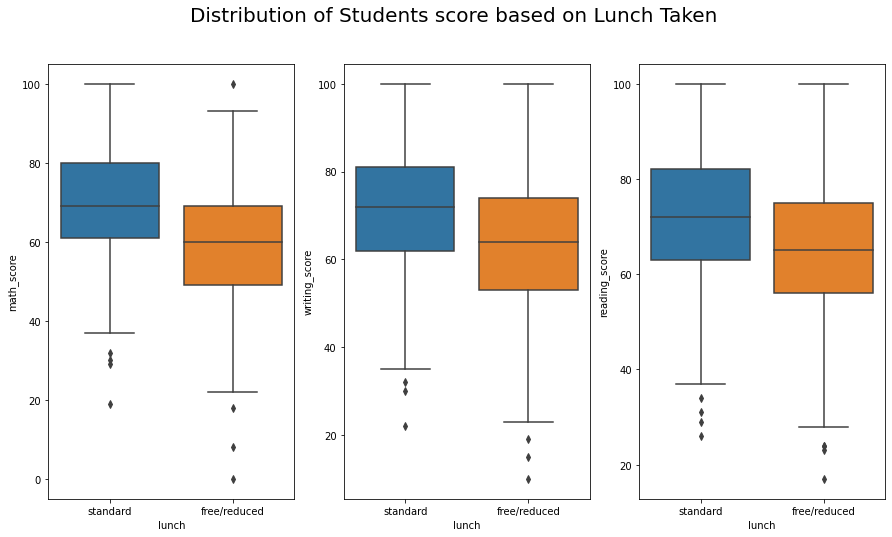

In [80]:
#Boxplot
f, ax = plt.subplots(1,3, figsize= (15,8))
f.suptitle('Distribution of Students score based on Lunch Taken', size = 20 )
sns.boxplot(data = data, x = 'lunch', y = 'math_score', ax = ax[0])
sns.boxplot(data = data, x = 'lunch', y = 'writing_score', ax = ax[1])
sns.boxplot(data = data, x = 'lunch', y = 'reading_score', ax = ax[2])
plt.show()

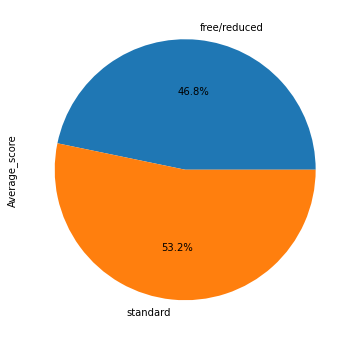

In [81]:
#Pie chart showing the distribution of average scores of students based on type of lunch taken
race = data.groupby('lunch')['Average_score'].mean()
plt.figure(figsize = (10,6))
race.plot.pie(autopct='%0.1f%%')
plt.show()

OBSERVATION_18

Students who eat standard lunch perform better in the test. Students with free/reduce lunch score lower on avergae in all 3 subjects.
This isn't very susprising, as lunch status is usually based on a family's socioeconomic status. Students from poorer families often have external pressures that hinder academics, whereas families in better financial situations are able to focus more resources and time into their childeren's academic success.



In [82]:
pd.crosstab(data['lunch'],data['prep_course' ])

prep_course,completed,none
lunch,,
free/reduced,131,224
standard,227,418


# 5TH FACTOR: TEST PREPARATION COURSE

In [83]:
data.groupby('prep_course').mean()

,math_score,reading_score,writing_score,Total_score,Average_score
prep_course,,,,,
completed,69.695531,73.893855,74.418994,218.008380,72.669469
none,64.077882,66.534268,64.504673,195.116822,65.038801


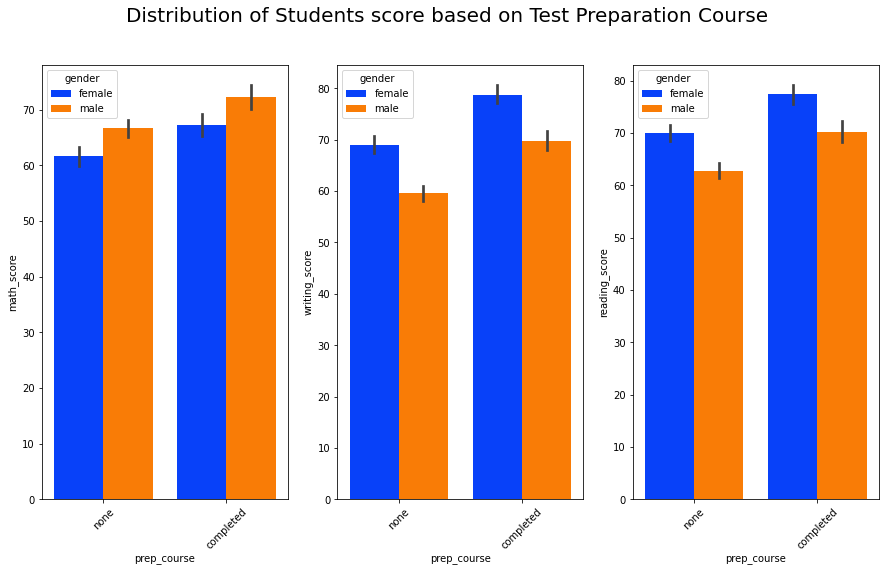

In [84]:
f, ax = plt.subplots(1,3, figsize= (15,8))
f.suptitle('Distribution of Students score based on Test Preparation Course', size = 20 )
p = sns.barplot(data = data, x = 'prep_course', y = 'math_score', hue = 'gender', palette = 'bright',ax=ax[0], saturation = 0.95)
plt.setp(p.get_xticklabels(), rotation=45)
plt.subplot(132)
p = sns.barplot(data = data, x = 'prep_course', y = 'writing_score', hue = 'gender', palette = 'bright',ax=ax[1], saturation = 0.95)
plt.setp(p.get_xticklabels(), rotation=45)
plt.subplot(133)
p = sns.barplot(data = data, x = 'prep_course', y = 'reading_score', hue = 'gender', palette = 'bright',ax=ax[2], saturation = 0.95)
plt.setp(p.get_xticklabels(), rotation=45)
plt.show()

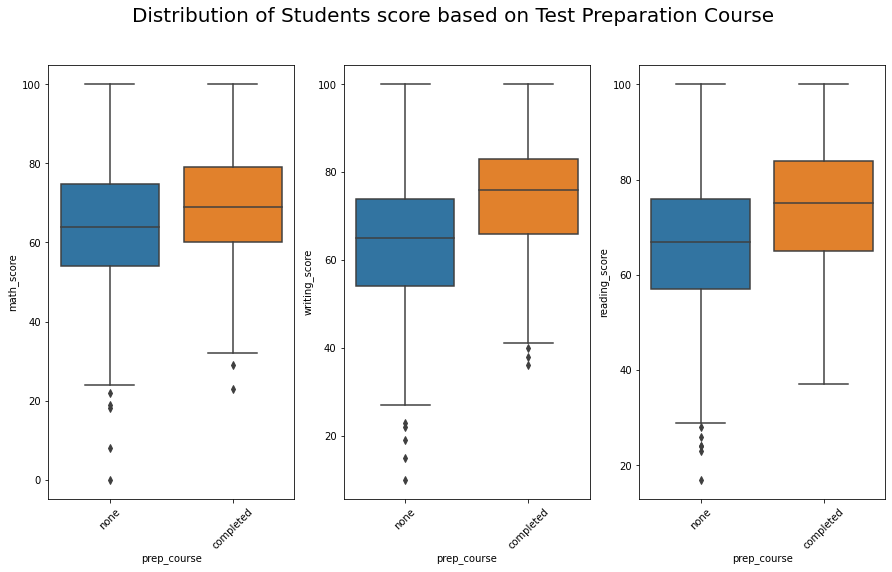

In [85]:
f, ax = plt.subplots(1,3, figsize= (15,8))
f.suptitle('Distribution of Students score based on Test Preparation Course', size = 20 )
p = sns.boxplot(data = data, x = 'prep_course', y = 'math_score', ax = ax[0])
plt.setp(p.get_xticklabels(), rotation=45)
p = sns.boxplot(data = data, x = 'prep_course', y = 'writing_score', ax = ax[1])
plt.setp(p.get_xticklabels(), rotation=45)
p = sns.boxplot(data = data, x = 'prep_course', y = 'reading_score', ax = ax[2])
plt.setp(p.get_xticklabels(), rotation=45)
plt.show()

OBSERVATION_19: Students who prepare for the exam perform better

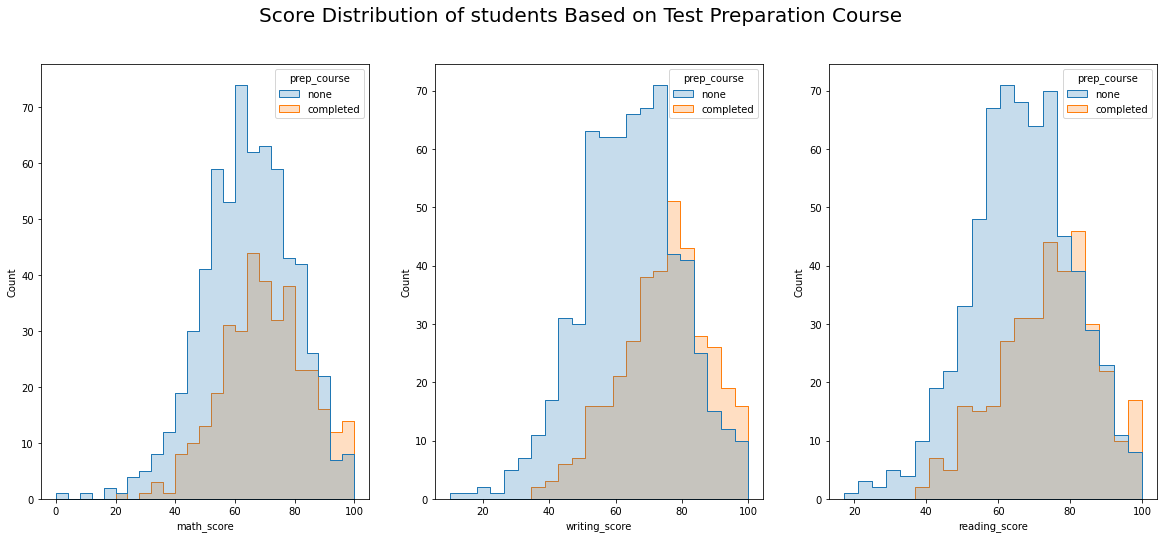

In [86]:
f,ax = plt.subplots(1,3, figsize=(20,8))
f.suptitle('Score Distribution of students Based on Test Preparation Course', size = 20)
sns.histplot(data, x= 'math_score', hue = 'prep_course', element = 'step', ax = ax[0])
sns.histplot(data, x= 'writing_score', hue = 'prep_course', element = 'step', ax = ax[1])
sns.histplot(data, x= 'reading_score', hue = 'prep_course', element = 'step', ax = ax[2])
plt.show()

OBSERVATION_20: By looking at the histograms, the students who took the course (orange) has a slights shift to the right compared to the students who didn't took the course (green). The green colored distribution overlapped on the orange colored distribution on the lower score parts and the orange colored distribution then overlapped on the green colored distribution on the higher score parts which means that if the students took the course, they are most likely will get higher score than those students who didn't.
Though, there are also a lot of students who didn't took the course and had more than average scores and some even aced the test.

TOTAL AND AVERAGE SCORES

In [87]:
data[data['Total_score'] == 300] #students who scored a total mark of 300

,gender,race_ethnicity,parent_Education,lunch,prep_course,math_score,reading_score,writing_score,Total_score,Average_score,Grade,math_status,reading_status,writing_status
458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.0,A,P,P,P
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,100.0,A,P,P,P
962,female,group E,associate's degree,standard,none,100,100,100,300,100.0,A,P,P,P


OBSERVATION_21: It is observed that all the toppers belong to group E race/ethnicity, the all have standard lunch and their parents have a degree. The top position is held by 2 female students and one male student. Among the three toppers, one student had completed test preparation course. 

In [88]:
#Last ten students
data.sort_values(by='Total_score', ascending = True).head(10)

,gender,race_ethnicity,parent_Education,lunch,prep_course,math_score,reading_score,writing_score,Total_score,Average_score,Grade,math_status,reading_status,writing_status
59,female,group C,some high school,free/reduced,none,0,17,10,27,9.00,F,F,F,F
980,female,group B,high school,free/reduced,none,8,24,23,55,18.33,F,F,F,F
596,male,group B,high school,free/reduced,none,30,24,15,69,23.00,F,F,F,F
327,male,group A,some college,free/reduced,none,28,23,19,70,23.33,F,F,F,F
76,male,group E,some high school,standard,none,30,26,22,78,26.00,F,F,F,F
17,female,group B,some high school,free/reduced,none,18,32,28,78,26.00,F,F,F,F
601,female,group C,high school,standard,none,29,29,30,88,29.33,F,F,F,F
787,female,group B,some college,standard,none,19,38,32,89,29.67,F,F,F,F
338,female,group B,some high school,free/reduced,none,24,38,27,89,29.67,F,F,F,F
211,male,group C,some college,free/reduced,none,35,28,27,90,30.00,F,F,F,F


OBSERVATION_22

1. The lowest score was obtained by a female student who belongs to group C. She took a free/reduced lunch and had not completed any test preparation course. Her parents were some high school graduate.

2. It is observed that students who scored the least marks and failed all the 3 courses didn't take the test preparation course. So it is good to prepare for an exam before sitting for it.

### GRADE

Text(0.5, 1.0, 'Distribution of Students Grade and Test preparation Course')

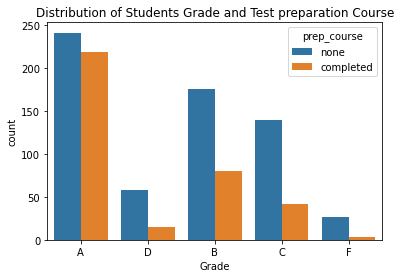

In [89]:
sns.countplot(x = data['Grade'], hue = data['prep_course'])
plt.title('Distribution of Students Grade and Test preparation Course')

OBSERVATION_23: susprisingly, most students who has 'A' grade didn't opt-in for the test preparation course

Text(0.5, 1.0, 'Distribution of Students Grade and Type of Lunch Taken')

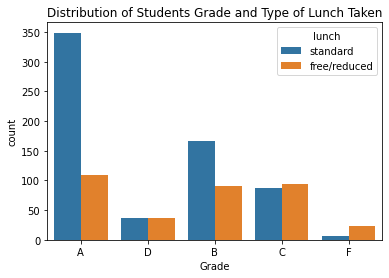

In [90]:
sns.countplot(x = data['Grade'], hue = data['lunch'])
plt.title('Distribution of Students Grade and Type of Lunch Taken')

OBSERVATION_24: Most students who had A grade took a standard lunch.

Text(0.5, 1.0, 'Distribution of Students Grade and Parent Level of Education')

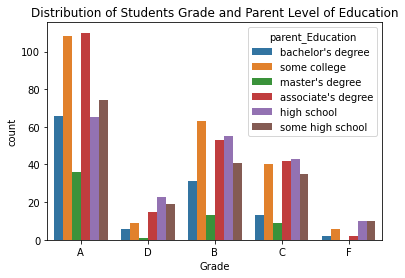

In [91]:
sns.countplot(x = data['Grade'], hue = data['parent_Education'])
plt.title('Distribution of Students Grade and Parent Level of Education')

OBSERVATION_25: The parents of most students with 'A' grade had associate's and bachelor's degress

Text(0.5, 1.0, 'Distribution of Students Grade and their Race/Ethnicity')

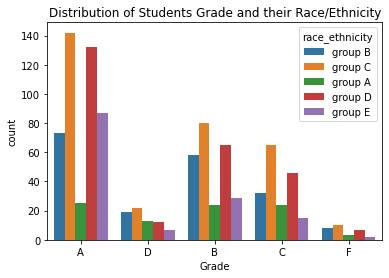

In [92]:
sns.countplot(x = data['Grade'], hue = data['race_ethnicity'])
plt.title('Distribution of Students Grade and their Race/Ethnicity')

OBSERVATION_26: As expected, students with the most 'A' grade were from the group c and group D while the lowest were from group A

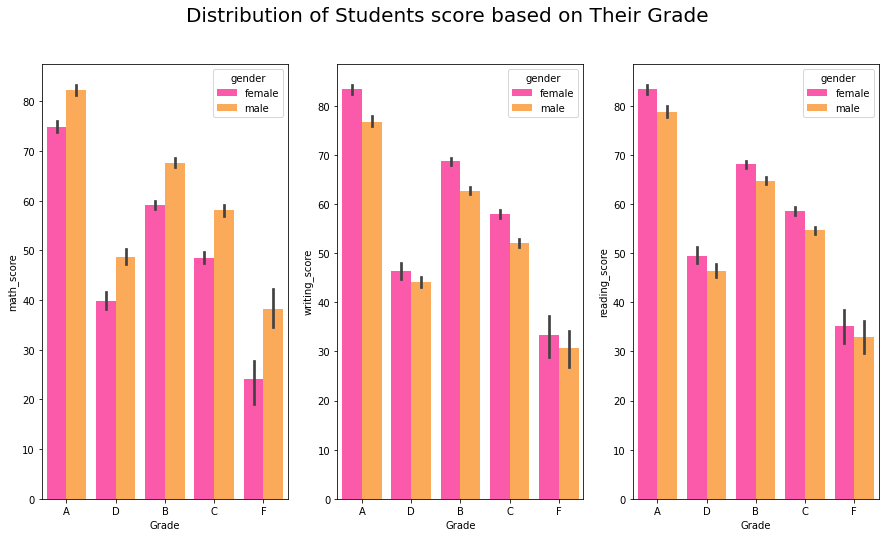

In [93]:
f, ax = plt.subplots(1,3, figsize= (15,8))
f.suptitle('Distribution of Students score based on Their Grade', size = 20 )
sns.barplot(data = data, x = 'Grade', y = 'math_score', hue = 'gender', palette = 'spring',ax=ax[0], saturation = 0.95)
plt.subplot(132)
sns.barplot(data = data, x = 'Grade', y = 'writing_score', hue = 'gender', palette = 'spring',ax=ax[1], saturation = 0.95)
plt.subplot(133)
sns.barplot(data = data, x = 'Grade', y = 'reading_score', hue = 'gender', palette = 'spring',ax=ax[2], saturation = 0.95)
plt.show()

OBSERVATION_27: Male students had the highest number of 'A' grade in math, female had the highest in writing and reading. This is in agreement with the analysis above that female students perfomed better in writing and reading

# CONCLUSION/SUMMARY

A. SUMMARY

1. The difference between the number of male and female in the dataset is not too wide. There are 518 female and 482 male.
2. Majority  Ethnic group is group C and minority is group A. 319 students belong to group C and 89 from group A
3. The level of education of the parents of the students is mostly College and the least is masters. 226 parents have some college degrees and 59 parents hold a master's degree certificate.
4. The Lunch category is dominated by standard lunch. About 645 out of 1000 students opt-in for standard lunch.
5. Also majority of students do not take the test preparation course. Only 358 students complete the test preparation course and other 642 do not complete it.


B. FACTORS THAT INFLUENCE STUDENTS PERFORMANCE.

1. Gender of a students is not dependent on the overall perfomance of a student. However, it is observed that even though there are 2 female students who have scored a perfect score of 100 in math, male students usually outperform female students in mathematics. Female students perform better than male students in reading and writing test. Averagely, the female students performed better than the male students.

2. It is observd that students who belong to group E race/ethnicity perform better than than the other students in the class. Group D students are the second best and Students from group A score the least on an average.

3. Parent's level of education matters when it comes to the students performance. It is observed that children of parents who hold a college degree - either a bachelors, masters or an associate degree perform better than children of parents who are high school graduates. It can be concluded that:

    a. Higher levels of education mean a higher socioeconomic status, as well as a greater empahasis placed on the importance of education, leading to higher test scores;
    
    b. Parents with higher education degree can teach their children at home.
    

4. A student's family income plays a huge role in the student's academic. Students who opt for standard lunch tend to score better than students who opt for free lunch. Students from poorer families often have external pressures that hinder academics, whereas families in better financial situations are able to focus more resources and time into their childeren's academic success. 

5. completion of test preparation course is very important. Students who complete the test preparation course tend to perform better than students who do not finish it.

6. It is observed that all the toppers belong to group E race/ethnicity, they all have standard lunch and their parents have a degree. The top position is held by 2 female students and one male student. Among the three toppers, one student had completed test preparation course.

7. The lowest score was obtained by a female student who belongs to group C. She took a free/reduced lunch and had not completed any test preparation course. Her parents were some high school graduate.

8. It is observed that students who scored the least marks and failed all the 3 courses didn't take the test preparation course. So it is good to prepare for an exam before sitting for it.

